In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
import zipfile

path = '../content/drive/MyDrive/Colab Notebooks/opencv_project/archive.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

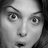

In [45]:
tf.keras.preprocessing.image.load_img('/content/train/surprise/Training_8796.jpg')

In [46]:
sample=tf.keras.preprocessing.image.load_img('/content/train/happy/Training_1206.jpg')
np.array(sample).shape

(48, 48, 3)

In [47]:
train_data_generator = ImageDataGenerator(horizontal_flip=True,rescale=1/255)  # Degree range for random rotations
                                    #  zoom_range=0.2,  # Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
                                    #  horizontal_flip=True,  # Randomly flip inputs horizontally
                                    #  rescale=1/255)  # Rescaling by 1/255 to normalize

In [48]:
train_dataset = train_data_generator.flow_from_directory(directory='/content/train',
                                                    target_size=(48, 48),  # Tuple of integers (height, width), defaults to (256, 256)
                                                    class_mode='categorical',
                                                    batch_size=16,  # Size of the batches of data (default: 32)
                                                    shuffle=True,  # Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order
                                                    seed=10)

Found 28709 images belonging to 7 classes.


In [49]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [50]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [51]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [52]:
test_generator = ImageDataGenerator(rescale=1/255)

test_dataset = test_generator.flow_from_directory(directory='/content/test',
                                                  target_size=(48, 48),
                                                  class_mode='categorical',
                                                  batch_size=1,
                                                  shuffle=True)

Found 7178 images belonging to 7 classes.


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D , Conv2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [54]:
len(np.unique(train_dataset.classes))

7

In [69]:
num_classes = len(np.unique(train_dataset.classes))
num_detectors = 32
w, h = np.array(sample).shape[:2]

model = Sequential()

model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(w, h, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(2*2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='../content/drive/MyDrive/Colab Notebooks/opencv_project/model/face_emotion.hdf5', verbose=0, save_best_only=True)
early_stopping = EarlyStopping(patience=5)

In [75]:
model.fit(train_dataset, epochs=100, validation_data=test_dataset,batch_size=32, validation_steps=8, callbacks=[early_stopping,checkpointer])

Epoch 1/100
1795/1795 [==============================] - 49s 27ms/step - loss: 1.0385 - accuracy: 0.6167 - val_loss: 0.9738 - val_accuracy: 0.5000
Epoch 2/100
1795/1795 [==============================] - 49s 27ms/step - loss: 1.0228 - accuracy: 0.6247 - val_loss: 1.0508 - val_accuracy: 0.5000
Epoch 3/100
1795/1795 [==============================] - 51s 28ms/step - loss: 1.0076 - accuracy: 0.6263 - val_loss: 1.1337 - val_accuracy: 0.6250
Epoch 4/100
1795/1795 [==============================] - 48s 27ms/step - loss: 1.0017 - accuracy: 0.6307 - val_loss: 1.0261 - val_accuracy: 0.6250
Epoch 5/100
1795/1795 [==============================] - 50s 28ms/step - loss: 0.9883 - accuracy: 0.6385 - val_loss: 1.0436 - val_accuracy: 0.6250
Epoch 6/100
1795/1795 [==============================] - 51s 28ms/step - loss: 0.9892 - accuracy: 0.6336 - val_loss: 0.9118 - val_accuracy: 0.6250
Epoch 7/100
1795/1795 [==============================] - 51s 28ms/step - loss: 0.9782 - accuracy: 0.6423 - val_loss: 1

In [74]:
model.evaluate(test_dataset)

7178/7178 [==============================] - 33s 5ms/step - loss: 1.0255 - accuracy: 0.6145


[1.0255069732666016, 0.61451655626297]

In [ ]:
# import cv2
# import sys
# import dlib

In [ ]:
# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#   print('camera open failed')
#   sys.exit()

# while True:
#   ret, frame = cap.read()
#   if not ret:
#     print('frame read failed')
#     sys.exit()

#   face_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/opencv_project/mmod_human_face_detector.dat')

#   face_detection = face_detector(frame, 1)

#   left, top, right, bottom = face_detection[0].rect.left(), face_detection[0].rect.top(), face_detection[0].rect.right(), face_detection[0].rect.bottom()

#   frame = frame[top:bottom, left:right]

#   cv2_imshow(frame)